In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd drive/

/content/drive


In [3]:
cd MyDrive/

/content/drive/MyDrive


In [4]:
cd 'Colab Notebooks'/

/content/drive/MyDrive/Colab Notebooks


In [5]:
ls

'Copy of Welcome To Colab'   Untitled0.ipynb   Untitled2.ipynb   Untitled4.ipynb
 forestfires.csv             Untitled1.ipynb   Untitled3.ipynb   Untitled5.ipynb


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the visualization style
plt.style.use('seaborn-v0_8')

# Load the dataset
df = pd.read_csv('forestfires.csv')
df = pd.read_csv("forestfires.csv")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
print(df.head())

# Check the shape of the dataset
print("\
Dataset shape:", df.shape)

# Check data types
print("\
Data types:")
print(df.dtypes)

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Dataset shape: (517, 13)
Data types:
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object
Missing values:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [8]:
df.duplicated().sum()

np.int64(4)

In [9]:
numeric_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

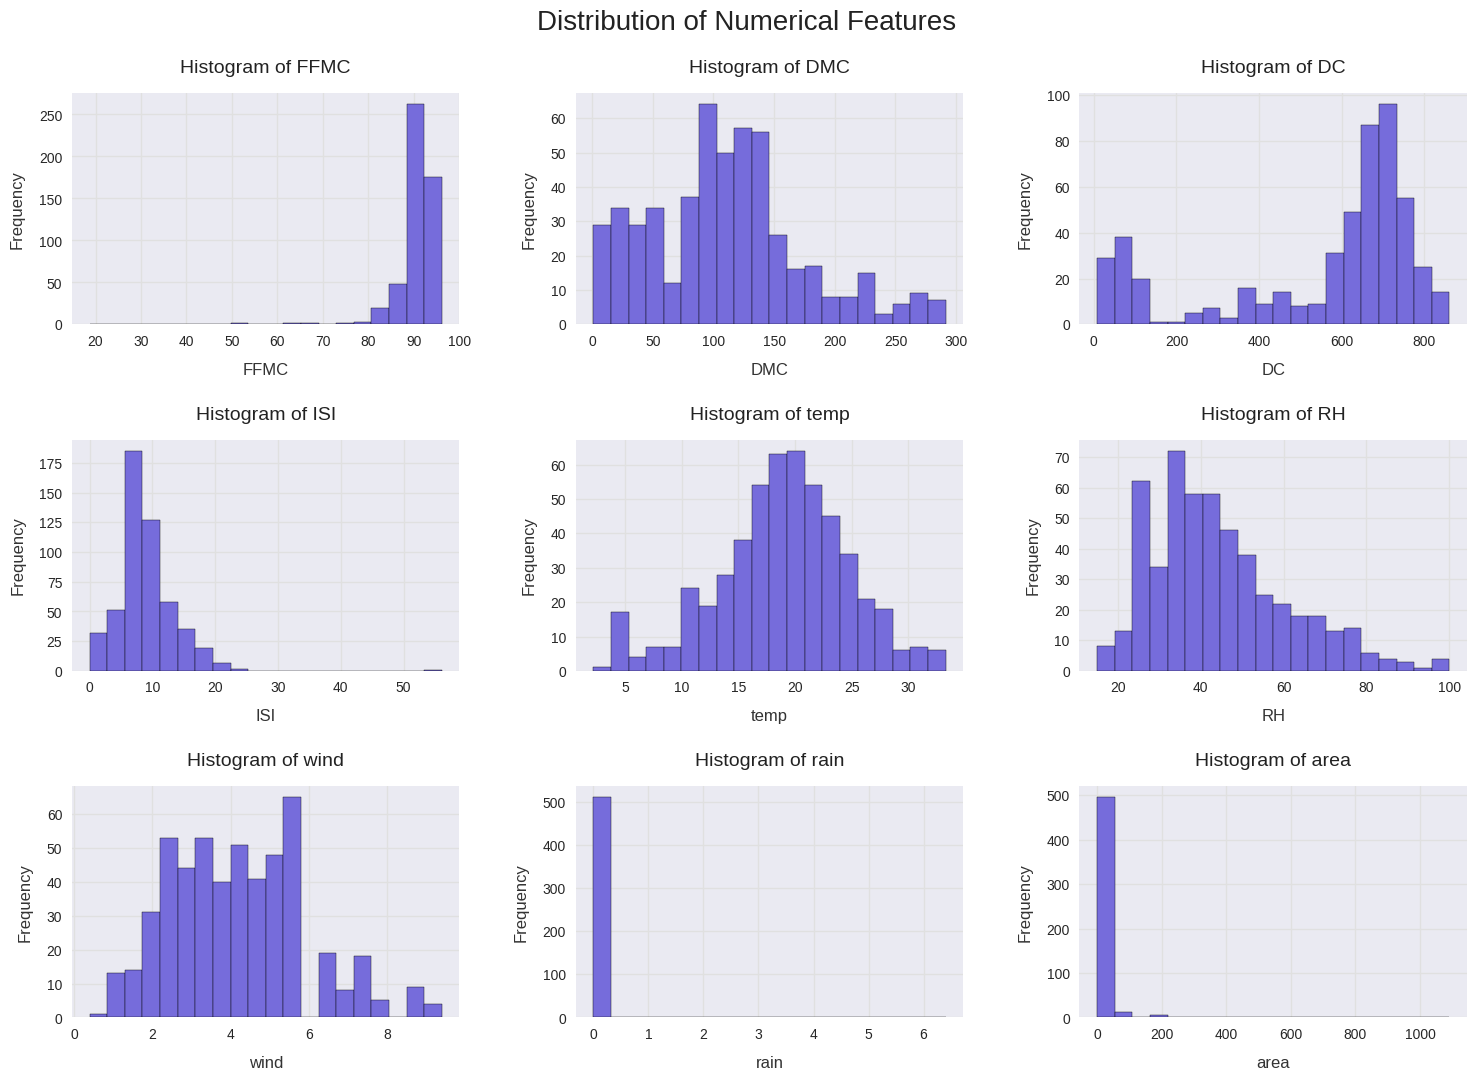

In [10]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, col in enumerate(numeric_columns):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[col], bins=20, color='#766CDB', edgecolor='black')
    plt.title('Histogram of ' + col, pad=15, fontsize=14, color='#222222')
    plt.xlabel(col, labelpad=10, fontsize=12, color='#333333')
    plt.ylabel('Frequency', labelpad=10, fontsize=12, color='#333333')
    plt.grid(color='#E0E0E0')
plt.suptitle('Distribution of Numerical Features', fontsize=20, color='#222222', y=0.95)
plt.show()

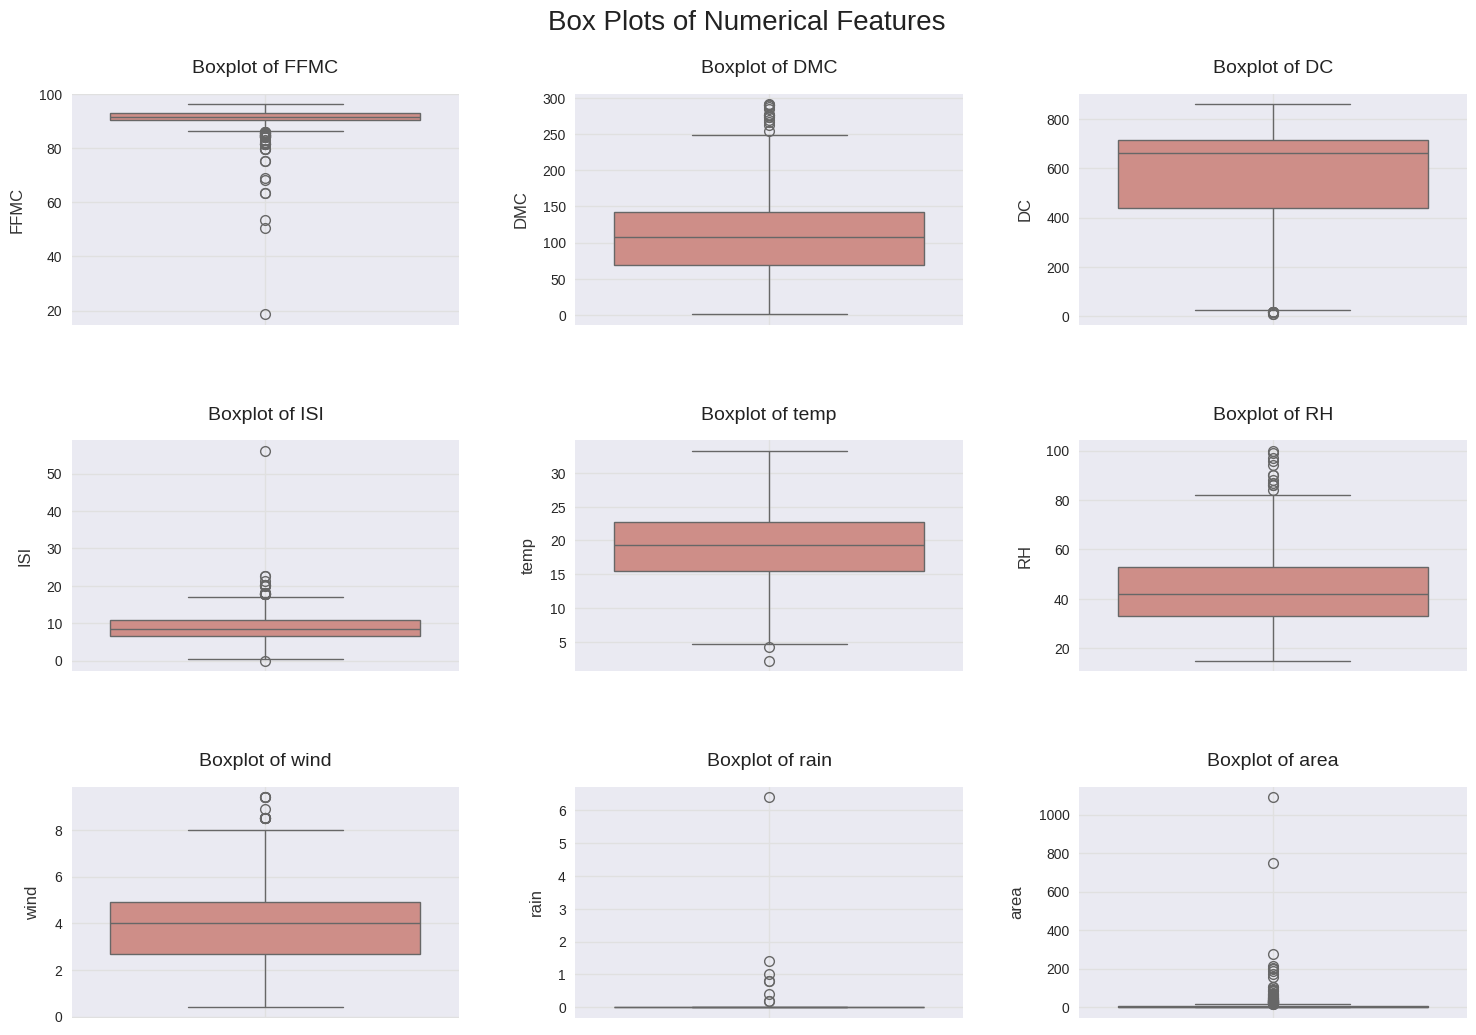

In [11]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, col in enumerate(numeric_columns):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(y=df[col], color='#DA847C')
    plt.title('Boxplot of ' + col, pad=15, fontsize=14, color='#222222')
    plt.ylabel(col, labelpad=10, fontsize=12, color='#333333')
    plt.grid(color='#E0E0E0')
plt.suptitle('Box Plots of Numerical Features', fontsize=20, color='#222222', y=0.95)
plt.show()

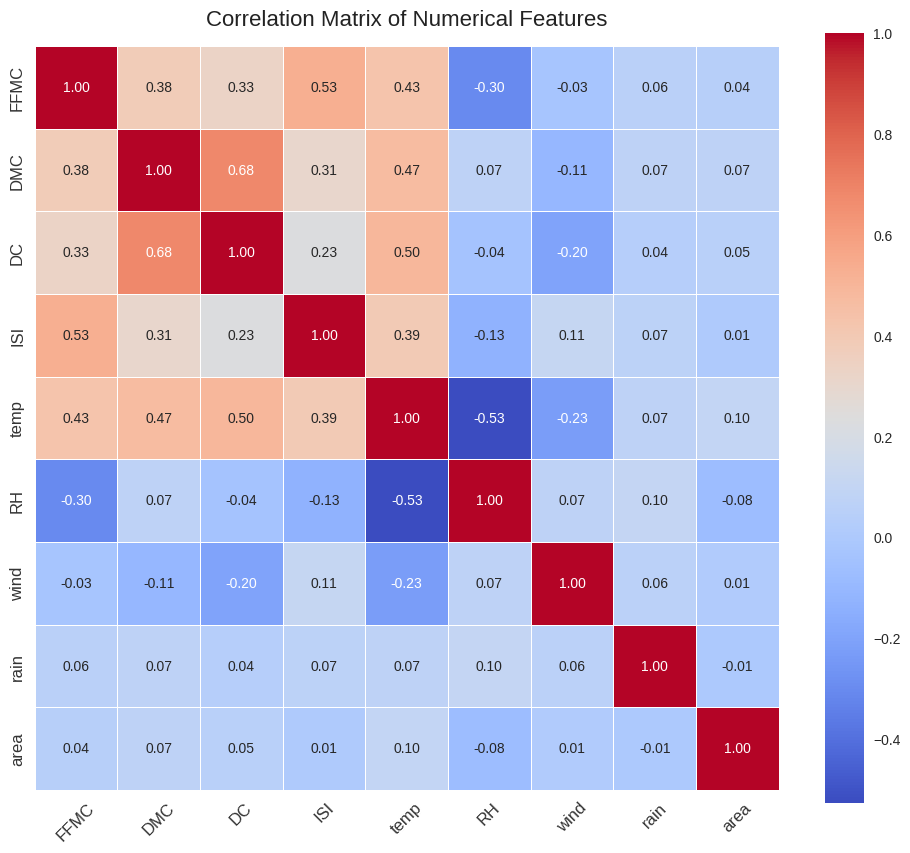

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Numerical Features', pad=15, fontsize=16, color='#222222')
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.show()

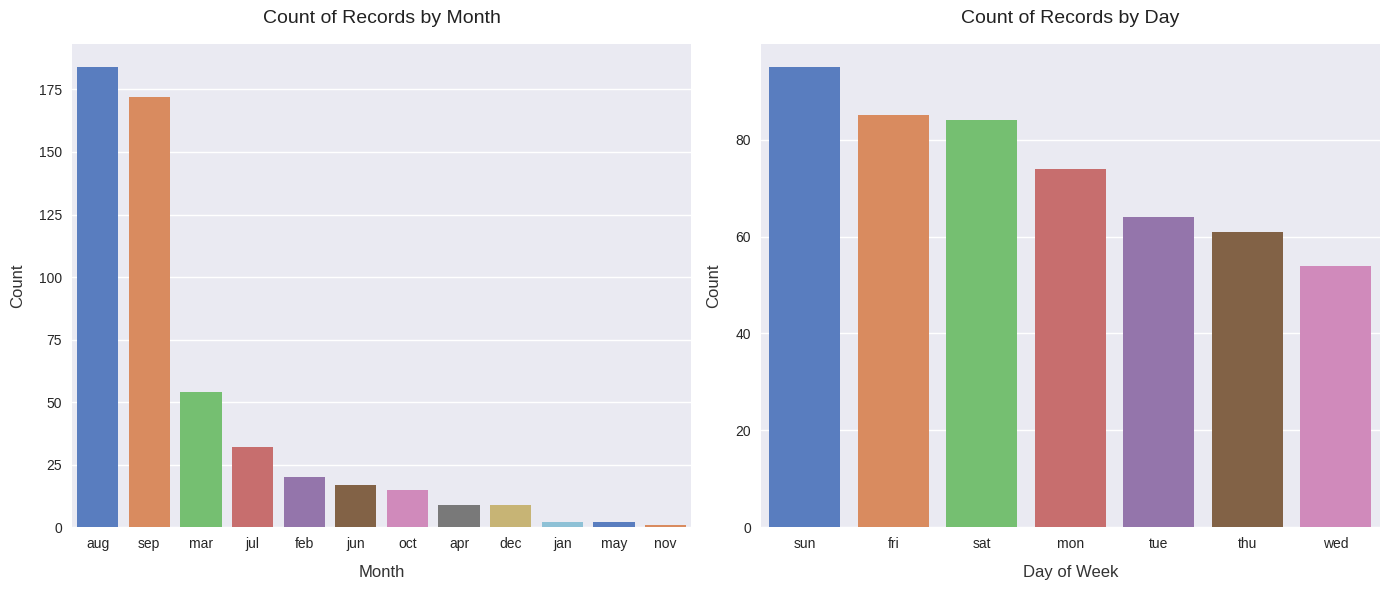

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Subplot 1: Records by Month
plt.subplot(1, 2, 1)
month_counts = df['month'].value_counts()
sns.barplot(x=month_counts.index, y=month_counts.values, hue=month_counts.index, palette='muted', legend=False)
plt.title('Count of Records by Month', pad=15, fontsize=14, color='#222222')
plt.xlabel('Month', labelpad=10, fontsize=12, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=12, color='#333333')

# Subplot 2: Records by Day
plt.subplot(1, 2, 2)
day_counts = df['day'].value_counts()
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette='muted', legend=False)
plt.title('Count of Records by Day', pad=15, fontsize=14, color='#222222')
plt.xlabel('Day of Week', labelpad=10, fontsize=12, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=12, color='#333333')

plt.tight_layout()
plt.show()


In [14]:
print('EDA complete. Data preprocessing steps conducted include handling duplicates (none found), verifying no missing values, and visual analysis to identify outliers, skewness, and correlations.')
print('Note: Numeric scaling and encoding categorical variables would be performed if modeling were to follow. In this EDA stage, the focus is to understand the raw distributions.')

print('done')

EDA complete. Data preprocessing steps conducted include handling duplicates (none found), verifying no missing values, and visual analysis to identify outliers, skewness, and correlations.
Note: Numeric scaling and encoding categorical variables would be performed if modeling were to follow. In this EDA stage, the focus is to understand the raw distributions.
done
